In [1]:
import pickle
with open("tweets_by_location.pfl","rb") as f1:
    tweets_by_location = pickle.load(f1)
    
with open("useful_twitter_melb.pfl","rb") as f1:
    useful_twitter_melb = pickle.load(f1)

In [60]:
import json
from tqdm import tqdm

with open("aurin.json","r") as f:
    house = json.load(f)
loc2020 = list(house["2020"].keys())
loc2020.reverse()
price2020 = list(house["2020"].values())
price2020.reverse()

In [16]:
def getFreq2020(query):
    count_tracker = { i : [0,0] for i in list(house["2020"].keys()) }
    
    for k,v in tqdm(tweets_by_location.items()):
        for each in v:
            count_tracker[k][1] += 1 # 1: total
            if query in each.text:
                count_tracker[k][0] += 1 # 0: freq
            
    freq = { k: round(v[0]/v[1],3) for k,v in count_tracker.items() }
    return freq

def getFreq2014(query):
    count_tracker = { i : [0,0] for i in list(house["2014"].keys()) }
    
    for k,v in tqdm(useful_twitter_melb.items()):
        for each in v:
            count_tracker[k][1] += 1 # 1: total
            if query in each["doc"]["text"]:
                count_tracker[k][0] += 1 # 0: freq
            
    freq = { k: round(v[0]/v[1],3) for k,v in count_tracker.items() }
    return freq


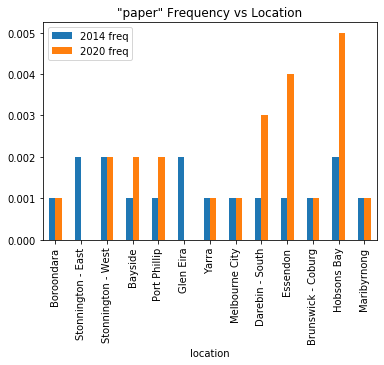

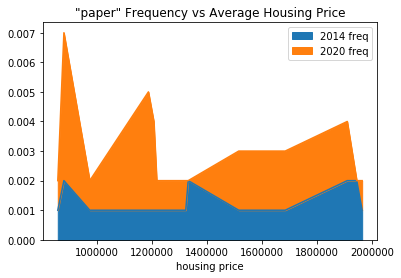

In [117]:
import pandas as pd
word = "paper"
data = {"housing price": list(house["2020"].values()), "location": list(house["2020"].keys()),
        "2014 freq": list(getFreq2014(word).values()), "2020 freq": list(getFreq2020(word).values())}
df = pd.DataFrame(data)
ax = df.plot.bar(title="\""+word+"\" Frequency vs Location", x="location", y=["2014 freq", "2020 freq"])
bx = df.plot(title="\""+word+"\" Frequency vs Average Housing Price", kind="area", x="housing price")

<BarContainer object of 13 artists>

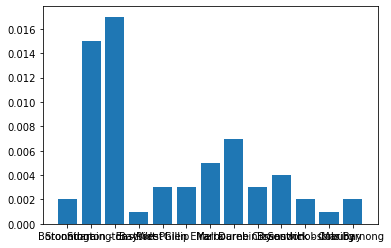

In [15]:
from matplotlib import pyplot
pyplot.bar(house["2020"].keys(), getFreq2020("covid").values())

<BarContainer object of 13 artists>

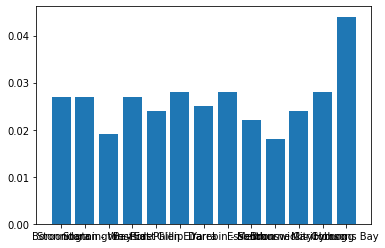

In [14]:
pyplot.bar(house["2014"].keys(), getFreq2014("good").values())

In [98]:
word_freq = {#"housing price": list(house["2020"].values()), "location": list(house["2020"].keys()),
    'melbourne': [0.03,
  0.06,
  0.06,
  0.12,
  0.15,
  0.03,
  0.05,
  0.03,
  0.07,
  0.21,
  0.04,
  0.03,
  0.04],
 'today': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0],
 'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'humidity': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'temperature': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'barometer': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'hpa': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'slowly': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12, 0, 0, 0],
 'wind': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12, 0, 0, 0],
 'rising': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09, 0, 0, 0],
 'kilda': [0, 0, 0, 0, 0.17, 0, 0, 0, 0, 0, 0, 0, 0],
 'beach': [0, 0, 0, 0.27, 0.14, 0, 0, 0, 0, 0, 0, 0, 0.05],
 'park': [0, 0, 0, 0, 0.06, 0, 0, 0, 0, 0, 0, 0, 0],
 'stkilda': [0, 0, 0, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0],
 'day': [0.03, 0.03, 0, 0.06, 0.04, 0.03, 0.03, 0.03, 0.04, 0, 0, 0.02, 0.04],
 'pls': [0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0, 0, 0],
 'australia': [0, 0, 0, 0.04, 0.03, 0, 0, 0, 0, 0, 0, 0, 0],
 'vic': [0.03, 0.03, 0.05, 0.03, 0.03, 0.03, 0.03, 0, 0.04, 0, 0, 0, 0],
 'love': [0.03, 0.03, 0, 0, 0.03, 0.03, 0, 0, 0, 0, 0.03, 0.03, 0],
 'brighton': [0, 0, 0, 0.32, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'bathing': [0, 0, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'boxes': [0, 0, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'brightonbeach': [0, 0, 0, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'sandringham': [0, 0, 0, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'like': [0.03, 0.03, 0, 0, 0, 0.03, 0.03, 0.03, 0.03, 0, 0.03, 0.03, 0.03],
 'timeline': [0.03, 0, 0.07, 0, 0, 0.03, 0, 0.04, 0.03, 0, 0.03, 0.04, 0.05],
 'initiated': [0.03, 0, 0.06, 0, 0, 0.03, 0, 0.03, 0.03, 0, 0.03, 0.04, 0.05],
 'good': [0.02, 0.03, 0, 0, 0, 0.03, 0.03, 0.03, 0, 0, 0.03, 0.03, 0.05],
 'get': [0, 0.03, 0, 0, 0, 0.03, 0.02, 0.03, 0.03, 0, 0.02, 0.03, 0.03],
 'one': [0.02, 0.03, 0, 0, 0, 0.03, 0.02, 0.02, 0, 0, 0.03, 0.02, 0],
 'richmond': [0, 0.04, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0],
 'new': [0, 0.03, 0, 0, 0, 0, 0.03, 0, 0, 0, 0, 0, 0],
 'closed': [0, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'ashburton': [0, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'lane': [0, 0, 0.04, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'chadstone': [0, 0, 0.04, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'east': [0, 0, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'cafe': [0, 0, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'hawthorn': [0.04, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'collingwood': [0, 0, 0, 0, 0, 0, 0.03, 0, 0, 0, 0, 0, 0],
 'preston': [0, 0, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0],
 'northcote': [0, 0, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0],
 'brunswick': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0, 0],
 'coburg': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0, 0],
 'footscray': [0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0, 0, 0.02, 0],
 'flemington': [0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0, 0, 0, 0],
 'victoria': [0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0, 0, 0, 0],
 'williamstown': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09],
 'altona': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07]}

len(word_freq)

49

In [100]:
a = {}
for k,v in word_freq.items():
    check = False
    for each in v:
        if each>0.1:
            check=True
    if check:
        a[k] = v
        
a["housing price"]= list(house["2020"].values())
a["location"]= list(house["2020"].keys())

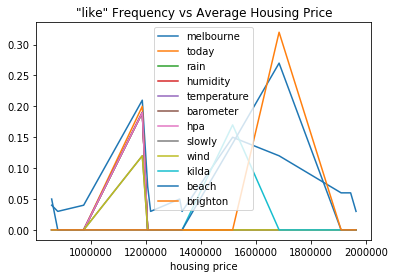

In [101]:
wf = pd.DataFrame(a)
bx = wf.plot(title="\""+word+"\" Frequency vs Average Housing Price", kind="line",x="housing price")